In [1]:
import matplotlib.pyplot as plt
import matplotlib.table as tbl
import math
import numpy as np
import pandas as pd

import csv
import os

In [199]:
# Load data

# Expects all relevant files to be in this folder
folder = 'FDs_20SizeBy1'
files = [f for f in os.listdir(folder) if 'Lung' in f]

df_list = []
for f in files:
    df_dict = {}
    with open(os.path.join(folder, f), 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        csv_data = list(csv_reader)
    
    sc_arr = np.asarray(csv_data[4:]).astype(int)
    sizes, counts = sc_arr[:, 0], sc_arr[:, 1]
    
    df_dict = {
        'SID':                 '_'.join(f.split('_')[:-2]),
        'Lobe':                '',
        'Fractal_Dimension':   float(csv_data[0][1]),
        'Coefficients':        np.array([csv_data[1][1], csv_data[2][1]]).astype(float),
        'Sizes':               sizes,
        'Counts':              counts,
    }
    
    if 'left' in f:
        df_dict['Lobe'] = 'left'
    elif 'right' in f:
        df_dict['Lobe'] = 'right'
    else:
        df_dict['Lobe'] = 'whole'
    
    df_list.append(df_dict)

df = pd.DataFrame(df_list)
display(df)

,SID,Lobe,Fractal_Dimension,Coefficients,Sizes,Counts
0,001_pect_phfirst_060413,left,2.298448,"[-2.2984484776467906, 13.905963078389883]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[1029, 1168, 1369, 1568, 1821, 2140, 2549, 308..."
1,001_pect_phfirst_060413,right,2.398736,"[-2.3987360760176326, 14.50314311514082]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[1387, 1592, 1833, 2108, 2487, 2938, 3555, 429..."
2,001_pect_phfirst_060413,whole,2.357707,"[-2.35770697928451, 14.936184295242553]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[2428, 2764, 3199, 3663, 4305, 5117, 6094, 735..."
3,002_pect_phfirst_050913,left,2.313782,"[-2.313781819633829, 13.755919441958941]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[855, 979, 1127, 1293, 1499, 1778, 2085, 2538,..."
4,002_pect_phfirst_050913,right,2.254535,"[-2.254534810005419, 13.899666223624775]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[1168, 1313, 1517, 1747, 2043, 2420, 2852, 343..."
...,...,...,...,...,...,...
671,387_pect_phfirst_090117,right,2.287351,"[-2.2873507468875154, 13.76027526774278]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[912, 1040, 1186, 1385, 1590, 1883, 2267, 2727..."
672,387_pect_phfirst_090117,whole,2.292875,"[-2.29287524399908, 14.449961149457893]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[1795, 2028, 2315, 2724, 3143, 3712, 4434, 530..."
673,388_pect_phfirst_080516,left,2.280135,"[-2.2801354674698158, 12.565249245414638]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[306, 333, 381, 443, 502, 586, 695, 803, 983, ..."
674,388_pect_phfirst_080516,right,2.327465,"[-2.3274648855640407, 12.958186676708888]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[373, 418, 482, 547, 646, 773, 902, 1099, 1336..."


In [200]:
# Generate Stats!

r_squared_list = []
residuals_list = []
pairwise_slopes_list = []
for index, row in df.iterrows():
    sizes_log = np.log(row['Sizes'])
    counts_log = np.log(row['Counts'])
    coeffs = row['Coefficients']
    
    # Calculate R Squared
    correlation_matrix = np.corrcoef(sizes_log, counts_log)
    r_squared = correlation_matrix[0, 1]**2
    r_squared_list.append(r_squared)
    
    # Calculate Residuals
    residuals = counts_log - np.polyval(coeffs, sizes_log)
    residuals_list.append(residuals)
    
    # Calculate Pairwise Slopes
    pairwise_slopes = (counts_log[1:] - counts_log[:-1]) / (sizes_log[1:] - sizes_log[:-1])
    pairwise_slopes_list.append(pairwise_slopes)

df['R_Squared'] = r_squared_list
df['Residuals'] = residuals_list
df['Pairwise_Slopes'] = pairwise_slopes_list

df

,SID,Lobe,Fractal_Dimension,Coefficients,Sizes,Counts,R_Squared,Residuals,Pairwise_Slopes
0,001_pect_phfirst_060413,left,2.298448,"[-2.2984484776467906, 13.905963078389883]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[1029, 1168, 1369, 1568, 1821, 2140, 2549, 308...",0.998746,"[-0.08408405896830384, -0.07527362581273511, -...","[-2.4702142661531945, -2.936856346038483, -2.3..."
1,001_pect_phfirst_060413,right,2.398736,"[-2.3987360760176326, 14.50314311514082]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[1387, 1592, 1833, 2108, 2487, 2938, 3555, 429...",0.998357,"[-0.08227361616170725, -0.06746474577741957, -...","[-2.6874457516410635, -2.6071782148877087, -2...."
2,001_pect_phfirst_060413,whole,2.357707,"[-2.35770697928451, 14.936184295242553]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[2428, 2764, 3199, 3663, 4305, 5117, 6094, 735...",0.998575,"[-0.07830225363706766, -0.0696257790969197, -0...","[-2.5268611473633267, -2.7032895648793347, -2...."
3,002_pect_phfirst_050913,left,2.313782,"[-2.313781819633829, 13.755919441958941]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[855, 979, 1127, 1293, 1499, 1778, 2085, 2538,...",0.998916,"[-0.07334710198264105, -0.056598420411931194, ...","[-2.640309522147221, -2.6038488422682033, -2.4..."
4,002_pect_phfirst_050913,right,2.254535,"[-2.254534810005419, 13.899666223624775]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[1168, 1313, 1517, 1747, 2043, 2420, 2852, 343...",0.998462,"[-0.0826353680524532, -0.08125617485441872, -0...","[-2.281423182345367, -2.6711212755654037, -2.4..."
...,...,...,...,...,...,...,...,...,...
671,387_pect_phfirst_090117,right,2.287351,"[-2.2873507468875154, 13.76027526774278]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[912, 1040, 1186, 1385, 1590, 1883, 2267, 2727...",0.997505,"[-0.09234482427969404, -0.07833457744629158, -...","[-2.560490676788427, -2.4296715151232116, -2.7..."
672,387_pect_phfirst_090117,whole,2.292875,"[-2.29287524399908, 14.449961149457893]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[1795, 2028, 2315, 2724, 3143, 3712, 4434, 530...",0.997495,"[-0.08836048085448844, -0.08392454195016619, -...","[-2.379357092304757, -2.4480563028680717, -2.8..."
673,388_pect_phfirst_080516,left,2.280135,"[-2.2801354674698158, 12.565249245414638]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[306, 333, 381, 443, 502, 586, 695, 803, 983, ...",0.999308,"[-0.010988735487813983, -0.04338700723617528, ...","[-1.6485076468121371, -2.4905456944628837, -2...."
674,388_pect_phfirst_080516,right,2.327465,"[-2.3274648855640407, 12.958186676708888]","[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9...","[373, 418, 482, 547, 646, 773, 902, 1099, 1336...",0.998348,"[-0.06414658381722838, -0.06962691248821162, -...","[-2.2206219007953956, -2.634917759388623, -2.2..."


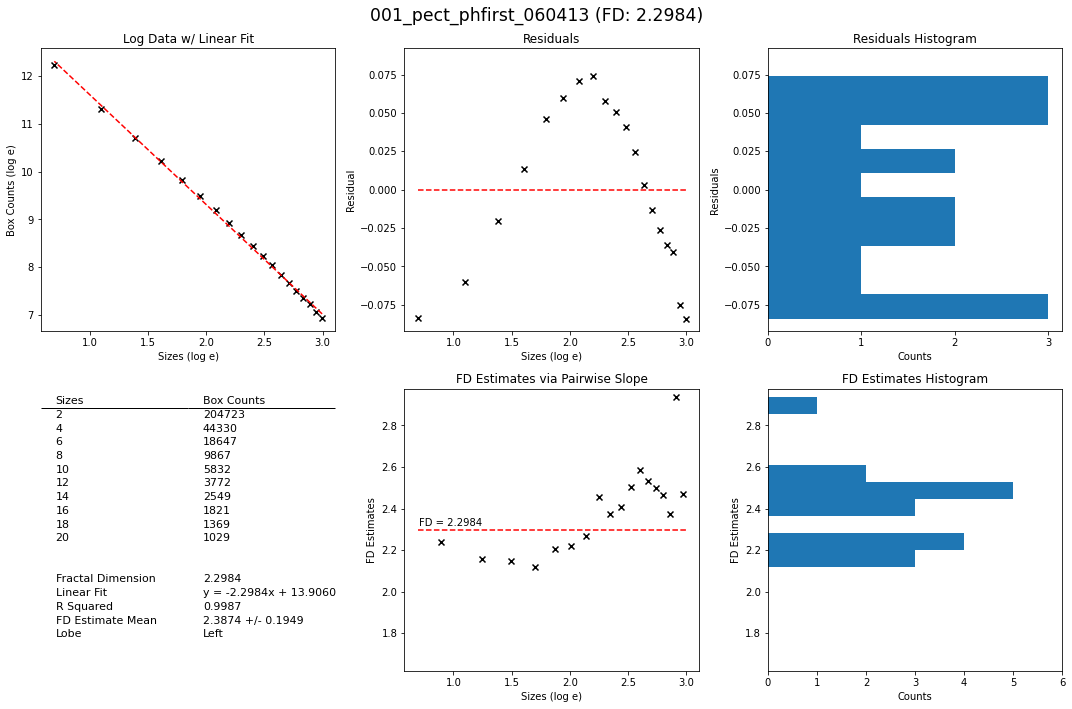

In [202]:
# Generate Figures!

# Create folders for each lobe
lobes = ['Left', 'Right', 'Whole']
for lobe in lobes:
    os.makedirs(lobe, exist_ok=True)

for num in range(0, len(df)):
    # Grab all of the needed values from the dataframe
    sizes_log = np.log(df['Sizes'][num])
    sizes_log_half = (sizes_log[1:] + sizes_log[:-1]) / 2
    counts_log = np.log(df['Counts'][num])
    coeffs = df['Coefficients'][num]
    r_squared = df['R_Squared'][num]
    residuals = df['Residuals'][num]
    pairwise_slopes = df['Pairwise_Slopes'][num]
    fd = df['Fractal_Dimension'][num]
    sid = df['SID'][num]
    lobe = df['Lobe'][num]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    plt.suptitle(f'{sid} (FD: {fd:.4f})', fontsize='xx-large')

    # Log Size vs Log Count w/ Linear Fit
    axes[0, 0].plot(sizes_log, np.polyval(coeffs, sizes_log), 'r--')
    axes[0, 0].scatter(sizes_log, counts_log, c='k', marker='x')
    axes[0, 0].set_title('Log Data w/ Linear Fit')
    axes[0, 0].set_xlabel('Sizes (log e)')
    axes[0, 0].set_ylabel('Box Counts (log e)')

    # Residuals w/ Mean Line
    axes[0, 1].hlines(0, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[0, 1].scatter(sizes_log, residuals, c='k', marker='x')
    axes[0, 1].set_title('Residuals')
    axes[0, 1].set_xlabel('Sizes (log e)')
    axes[0, 1].set_ylabel('Residual')
    yabs_max = abs(max(axes[0, 1].get_ylim(), key=abs))
    axes[0, 1].set_ylim(-yabs_max, yabs_max)

    # Residuals Hist
    axes[0, 2].hist(residuals, orientation='horizontal')
    axes[0, 2].set_title('Residuals Histogram')
    axes[0, 2].set_xlabel('Counts')
    axes[0, 2].set_ylabel('Residuals')
    axes[0, 2].set_ylim(-yabs_max, yabs_max)
    axes[0, 2].set_xticks([i for i in axes[0, 2].get_xticks() if not i % 1])

    # Pairwise_Slope w/ FD Line
    axes[1, 1].hlines(fd, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[1, 1].scatter(sizes_log_half, -pairwise_slopes, c='k', marker='x')
    axes[1, 1].set_title('FD Estimates via Pairwise Slope')
    axes[1, 1].set_xlabel('Sizes (log e)')
    axes[1, 1].set_ylabel('FD Estimates')
#     axes[1, 1].text(max(sizes_log)-4.1, fd+0.02, f'FD = {fd:.5}')
    axes[1, 1].text(0.7, fd+0.02, f'FD = {fd:.5}')
    yabs_max = abs(max(axes[1, 1].get_ylim()-fd, key=abs))
    axes[1, 1].set_ylim(fd-yabs_max, fd+yabs_max)

    # Pairwise_Slope Hist
    axes[1, 2].hist(-pairwise_slopes, orientation='horizontal')
    axes[1, 2].set_title('FD Estimates Histogram')
    axes[1, 2].set_xlabel('Counts')
    axes[1, 2].set_ylabel('FD Estimates')
    axes[1, 2].set_ylim(fd-yabs_max, fd+yabs_max)
    axes[1, 2].set_xticks([i for i in axes[1, 2].get_xticks() if not i % 1])

    # Data Table
    fd_estimate_mean = np.mean(-pairwise_slopes)
    fd_estimate_std = np.std(-pairwise_slopes)

    sizes = df['Sizes'][num][::-2]
    boxes = df['Counts'][num][::-2]
    
    # Add to Table
    cells = [['Sizes', 'Box Counts']]
    for size, count in zip(sizes, boxes):
        cells.append([str(size), str(count)])
    for i in range(0, 12-len(sizes)):
        cells.append(['', ''])

    cells.append(['Fractal Dimension', f'{fd:.4f}'])
    cells.append(['Linear Fit', f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}'])
    cells.append(['R Squared', f'{r_squared:.4f}'])
    cells.append(['FD Estimate Mean', f'{fd_estimate_mean:.4f} +/- {fd_estimate_std:.4f}'])
    cells.append(['Lobe', f'{lobe.capitalize()}'])

    axes[1, 0].axis('tight')
    axes[1, 0].axis('off')
    table = axes[1, 0].table(cells, cellLoc='left', loc='upper center')

    # More Table Shenanigans
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    for c in table.get_celld().values():
        c.visible_edges = ''
    table[(0, 0)].visible_edges = 'B'
    table[(0, 1)].visible_edges = 'B'

    plt.tight_layout()
    plt.savefig(f'{lobe.capitalize()}/{sid}_{lobe}LungVesselParticles_stats.png', facecolor=(1, 1, 1, 1), edgecolor='none')
    
#     if num > 1:
#         break
    
    # Close all figures except for the first to double check
    if num > 0:
        plt.close(fig)

In [177]:
keys = ['left', 'right', 'whole']
upper = {key: [] for key in keys}
lower = {key: [] for key in keys}

for num in range(0, len(df)):
    lobe = df['Lobe'][num]
    
    # FD > 3 and FD < 2
    upper[lobe].append(df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] > 3)])
    lower[lobe].append(df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] < 2)])

for key in keys:
    

In [184]:
display([f'{key} Mean: {np.mean(upper[key])} +/- {np.std(upper[key])}' for key in keys])
display([f'{key} Mean: {np.mean(lower[key])} +/- {np.std(lower[key])}' for key in keys])


['left Mean: 40.54222222222222 +/- 8.774166345683698',
 'right Mean: 40.60444444444445 +/- 8.37928545231382',
 'whole Mean: 47.10619469026549 +/- 8.950070778242317']

['left Mean: 33.093333333333334 +/- 6.176313175709636',
 'right Mean: 35.26222222222222 +/- 6.26295240597485',
 'whole Mean: 36.610619469026545 +/- 6.686313624243545']